In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import select_features
#archivo = '..\data\ISBSG - Release May 2017 R1.csv'
archivo = '..\data\ISBSG DATA Release 12.csv'
df = pd.read_csv(archivo, sep = ';', low_memory = False)
#variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
filtro = ((df['Data Quality Rating'] == 'A') | (df['Data Quality Rating'] == 'B')) & ((df['UFP rating'] == 'A') | (df['UFP rating'] == 'B')) 
df = df.loc[filtro, :]
filtro = (df['Normalised Work Effort Level 1'].notnull()) & (df['Normalised Work Effort Level 1'] == df['Summary Work Effort'])
df = df.loc[filtro, :]
filtro = df['Count Approach'] == 'IFPUG 4+'
df = df.loc[filtro, :]
#variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.dropna()
print(len(df))
df['Project Elapsed Time'] = df['Project Elapsed Time'].str.replace(',', '.').astype(float)
programmingLenguaje = {'A:G':'Unspecified', 'ASP.Net':'ASP', 'BASIC':'Visual Basic', 'CSP':'Unspecified', 'Visual C':'C'}
df['Primary Programming Language'].replace( programmingLenguaje, inplace = True)
database = {'[;].*':';','ACCESS[; ].*':'ACCESS', 'MS Access':'ACCESS', 'ACCESS;':'ACCESS', 'ADABAS;':'ADABAS', 'Micosoft.*':'Attain', 'DB2[; /].*':'DB2', 'IBM DB2':'DB2', 'UDB2':'DB2', 'Domino[ ].*':'Domino', 'LOTUS.*':'Domino', 'Notes.*':'Domino', 'Exchange.*':'Exchange', 'FOXPRO;':'Foxpro', 'HIRDB;':'HIRDB', 'DB[/].*':'IMS', 'DEDB;':'IMS', 'IDMS[; -].*':'IMS', 'IMS.*':'IMS', 'MS[- ]SQL[; ].*':'MS SQL', 'MSDE.*':'MS SQL', 'SQL Server[; ].*':'MS SQL', 'SQL;':'MS SQL', 'VSE/.*':'MS SQL', 'NCR;':'NCR', 'Oracle.*':'ORACLE', 'Personal O.*':'ORACLE', 'RDB[; ].*':'ORACLE', 'CICS;':'ORACLE', 'SAS;':'SAS', 'Solid;':'Solid', 'SYBASE.*':'SYBASE', 'YES':'Unspecified', 'ISAM;':'Unspecified', 'multiple;':'Unspecified', 'VSAM[; ].*':'Unspecified', 'WATCOM[; ].*':'Watcom', 'WGRES;':'WGRES'}
df['1st Data Base System'].replace( database, inplace = True, regex = True)
df['1st Data Base System'].replace( {'ACCESS;':'ACCESS'}, inplace = True, regex = True)

621


In [2]:
df = select_features.recode_dataframe(df)
tipo_columnas = {'Industry Sector': 'category', 'Application Group': 'category', 'Development Type': 'category', 'Development Platform': 'category', 'Language Type': 'category', 'Primary Programming Language':'category', '1st Data Base System': 'category', 'Used Methodology':'category'}
df = df.astype(tipo_columnas)
mmre = select_features.calcular_mmre('Normalised Work Effort Level 1', df)

TypeError: data type not understood

In [2]:
df.loc[:, ['Normalised Work Effort Level 1', 'Functional Size']]
mmre = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', df)
print(mmre)

(1.4412355261497551,       Normalised Work Effort Level 1
5                            18160.0
33                            2924.0
54                             668.0
90                            4805.0
106                           2006.0
...                              ...
5954                           129.0
5965                          2716.0
5991                          2185.0
5995                          1011.0
5998                          6269.6

[621 rows x 1 columns])


In [ ]:
df_r = select_features.recode_dataframe_R(df)
tipo_columnas = {'Industry_Sector': 'category', 'Application_Group': 'category', 'Development_Type': 'category', 'Development_Platform': 'category', 'Language_Type': 'category', 'Primary_Programming_Language':'category', 'First_Data_Base_System': 'category', 'Used_Methodology':'category'}
df_r = df_r.astype(tipo_columnas)
mmre = select_features.calcular_mmre_R('Normalised_Work_Effort_Level_1', df_r)

In [ ]:
mi = select_features.calcular_mi_manual('Normalised Work Effort Level 1', df)
variables_por_mi = list(mi.index.values)
resultados = []
df = select_features.recode_dataframe(df)
for i in range(500):
    var = variables_por_mi[:]
    mmre = select_features.greedy_forward_selection(1, 'Normalised Work Effort Level 1', var, df, seed=i)
    resultados.append((mmre[3])[-1])
final_value = np.mean(resultados)

In [ ]:
plt.plot(resultados)

In [ ]:
lista_variables = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
greedyfs = select_features.greedy_forward_selection(5, 'Normalised Work Effort Level 1', lista_variables, df, seed=1)

In [ ]:
lista_variables = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
variables_numericas = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time']
variables_nominales = ['Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
#results = select_features.evaluator(3, 5, df, 'Normalised Work Effort Level 1')
greedyfs = select_features.greedy_forward_selection(5, 'Normalised Work Effort Level 1', lista_variables, df)
print('Greedy Finalizado')
doquirefs = select_features.doquire_forward_selection(5, 'Normalised Work Effort Level 1', variables_numericas, variables_nominales, df)

In [ ]:
#Pruebas del algoritmo de extraccion
lista_variables = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time', 'Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
resultado = select_features.determinar_numero_variables('Normalised Work Effort Level 1', lista_variables, [], df, verbose=True)

In [ ]:
variables_numericas = ['Adjusted Function Points', 'Functional Size', 'Project Elapsed Time']
variables_nominales = ['Primary Programming Language', 'Industry Sector', '1st Data Base System', 'Development Platform', 'Used Methodology', 'Development Type', 'Language Type', 'Application Group']
df = select_features.recode_dataframe(df)
resultado = select_features.determinar_numero_variables('Normalised Work Effort Level 1', variables_numericas=variables_numericas, variables_nominales=variables_nominales, df=df, verbose=True)

In [ ]:
#Calcular MMRE utilizando R y VIM
df = select_features.recode_dataframe_R(df)
mmreR, resultado = select_features.calcular_mmre_R('Normalised_Work_Effort_Level_1', df)

In [ ]:
#Pruebas KNN con dataframes pequeños
df = select_features.recode_dataframe(df)
df_knn_small = df.iloc[0:5]
mmrev1, res1 = select_features.calcular_mmre('Normalised Work Effort Level 1',df_knn_small, k=2)
mmrev2, res2 = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', df_knn_small, k=2)
print('MMRE',mmrev1)
print('MMREv2',mmrev2)

In [ ]:
df = select_features.recode_dataframe(df)
pruebak = pd.DataFrame(columns=['Scikit', 'FancyImpute'])
for i in range(1,11):
    mmrev1 = select_features.calcular_mmre('Normalised Work Effort Level 1', df, i)
    mmrev2 = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', df, i)
    print('MMRE using', i, 'neighbors', mmrev1)
    print('MMREv2 using', i, 'neighbors', mmrev2)
    pruebak = pruebak.append({'Scikit':mmrev1, 'FancyImpute':mmrev2}, ignore_index=True)
pruebak.index += 1
pruebak.plot.bar(figsize=(10, 5))

In [ ]:
#df = select_features.recode_dataframe(df)
mmre = select_features.calcular_mmre('Normalised Work Effort Level 1', df, k=1)
mmre

In [ ]:
df = select_features.recode_dataframe_R(df)
mi1 = select_features.calcular_mi_R_2v('Project_Elapsed_Time', 'Functional_Size', df)
mi2 = select_features.calcular_mi_R_2v('Functional_Size', 'Project_Elapsed_Time' ,df)
print(mi1)
print(mi2)

In [ ]:
#df = select_features.recode_dataframe_R(df)
mi = select_features.calcular_mi_R('Normalised_Work_Effort_Level_1', select_features.recode_dataframe_R(df))
print(mi)
mi.plot.bar(figsize=(10, 5))

In [ ]:
df = select_features.recode_dataframe_R(df)
mrmr = select_features.calcular_mrmr_R('Normalised_Work_Effort_Level_1', df)
print(mrmr)
mrmr.plot.bar(figsize=(10, 6))

In [ ]:
mrmr.plot.bar(figsize=(10, 5))

In [ ]:
testing = select_features.calc_mi_scikit(df['1st Data Base System'], df['Adjusted Function Points'])
print(testing)
testing = select_features.calc_mi_scikit(df['Adjusted Function Points'], df['1st Data Base System'])
print(testing)

In [ ]:
mRMR = select_features.calcular_mrmr_v2('Normalised Work Effort Level 1', df)
#mRMR.sort_values(ascending=False).plot.bar(figsize=(10, 5))
mRMR.plot.bar(figsize=(10, 5))
mRMR.dtypes

In [ ]:
df.dtypes

Text(0, 0.5, 'Valores de MI')

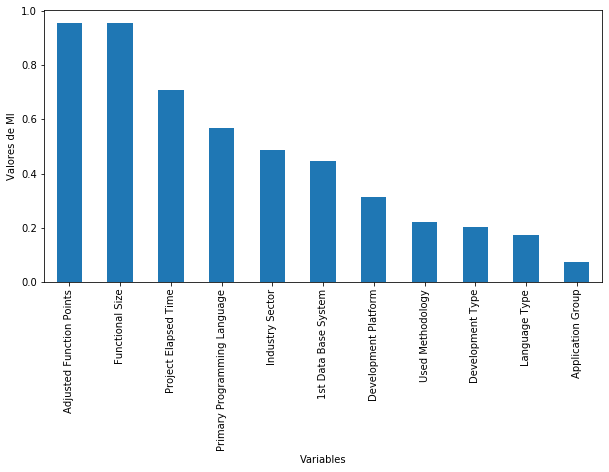

In [4]:
#Utilizando el método normalize_mutual_info_score
mi = select_features.calcular_mi_manual('Normalised Work Effort Level 1', df)
ax = mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
ax.set_xlabel('Variables')
ax.set_ylabel('Valores de MI')

In [ ]:
df.select_dtypes(include=["number"]).columns.values

In [ ]:
#variables = ['Industry Sector', 'Application Group', 'Development Type', 'Platform Development', 'Language Type', 'Primary Programming Language', '1st Data Base System', 'Used Methodology']
variables = ['1st Data Base System']
dcount = df.loc[:, variables]
for c in dcount.columns:
    print("---- %s ---" % c)
    print(dcount[c].value_counts())
    print('')